In this tutorial we show how to run ULTRAFAST for the ground state optimization of the Heisenberg model

\begin{equation}
\hat{H} = J_\text{ex}\sum_{\langle ij \rangle}\hat{S}_i \cdot \hat{S}_j
\end{equation}
defined on a $4\times 4$ lattice with $J_\text{ex}=1$.

The input data, such as network size, the optimization hyperparameters and model-dependent quantities used in this tutorial are set in the file "Examples/groundstate/main.jl". In particular, we initizilize an RBM with $\alpha=2$ and we perform 300 iterations with learning rate $\eta = 0.005$. We choose 2000 Monte Carlo samples and we parallelize the simulation across 3 workers (plus the master worker).

In [1]:
include("src/main/main.jl")

# Starting ground state optimization for the Heisenberg Hamiltonian, with 16 = 4 x 4 spins and α=2
# Number of workers = 1
# The following hyper-parameters are used:
# Number of sweeps = 2000,  iteration step = 300,  learning rate = 0.005


Iteration step #10
Energy: -36.087075132468875 +- 115.61648110731984
 


Iteration step #20
Energy: -35.82530066329354 +- 102.92354329052756
 


Iteration step #30
Energy: -36.488313036385065 +- 103.83335446478112
 


Iteration step #40
Energy: -38.346332280583475 +- 74.5495366295417
 


Iteration step #50
Energy: -41.947236036863224 +- 24.42076207006635
 


Iteration step #60
Energy: -43.57634309534017 +- 10.777808829791871
 


Iteration step #70
Energy: -44.21460261894831 +- 7.904422712814869
 


Iteration step #80
Energy: -44.14024601666291 +- 6.895363975062701
 


Iteration step #90
Energy: -44.39187095888253 +- 4.906500822022724
 


Iteration step #100
Energy: -44.586245667156795 +- 3.264213899625787
 


Iteration step #110
Energy: -44.65729720751659 +- 2.7050772800449234
 


Iteration step #120
Energy: -44.75314867432963 +- 2.5201492705367046
 


Iteration step #130
Energy: -44.850778479820406 +- 2.4370470574998566
 


Iteration step #140
Energy: -44.83110769960617 +- 2.423804611262798
 


Iteration step #150
Energy: -44.80971387282759 +- 2.063416671237795
 


Iteration step #160
Energy: -44.73808455768699 +- 2.2215424227189695
 


Iteration step #170
Energy: -44.79570128235832 +- 2.771247969756736
 


Iteration step #180
Energy: -44.77593104218518 +- 2.5509503695952906
 


Iteration step #190
Energy: -44.795077650183266 +- 2.6883718114397777
 


Iteration step #200
Energy: -44.78561358185953 +- 2.3952132389564067
 


Iteration step #210
Energy: -44.83914073712484 +- 2.695956237772574
 


Iteration step #220
Energy: -44.8161598938681 +- 2.22225423243653
 


Iteration step #230
Energy: -44.79298159758019 +- 2.7239009242216228
 


Iteration step #240
Energy: -44.758402822440054 +- 2.5214567487963935
 


Iteration step #250
Energy: -44.79969176188066 +- 2.389120743940059
 


Iteration step #260
Energy: -44.78757904790516 +- 2.685228097507997
 


Iteration step #270
Energy: -44.770535458858596 +- 2.485037179678384
 


Iteration step #280
Energy: -44.811188313583465 +- 2.5341365260187554
 


Iteration step #290
Energy: -44.830018677625205 +- 2.3372388708839313
 


Iteration step #300
Energy: -44.82247478178823 +- 2.6773041981096517
 
# ground state optimization completed
 
116.563418 seconds (13.21 M allocations: 13.108 GiB, 0.54% gc time, 2.63% compilation time: <1% of which was recompilation)


The optiization looks successful! To better visualize this, let us plot the evolution of the energy and energy variance (stored respectively in the variables Energy_ and Variance_) during the ground state optimization. To this purpose we first import the Plots package. 

In [2]:
using Plots

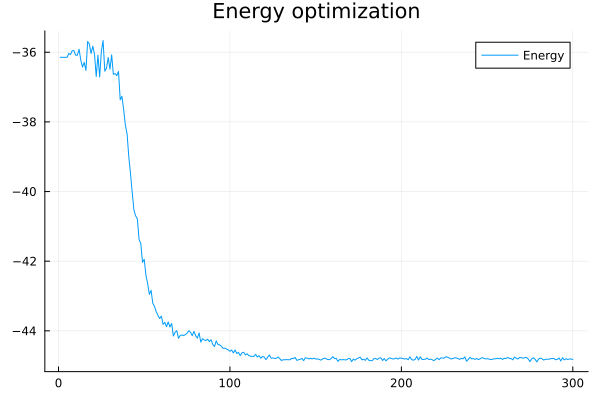

In [3]:
#Let's plot the evolution of the variational energy during the training
plot(collect(1:GS_HP.n_iter),Energy_,title = "Energy optimization", label = "Energy")

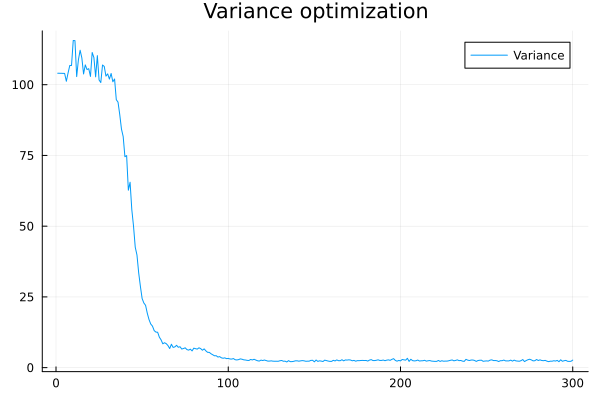

In [4]:
# Let's plot the evolution of the energy variance during the training
plot(collect(1:GS_HP.n_iter),Variance_,title = "Variance optimization", label = "Variance")

The (independent) network parameters obtained at the end of the ground state optimization are stored in the folder "src/output" and are termed "W_RBM_N_alpha_real.jl" for their real part, and "W_RBM_N_alpha_imag.jl" for their imaginary part. Now we upload them for later use.

In [5]:
#Upload trained network parameters
W_RBM = readdlm("W_RBM_16_2_real.jl") .+ im*readdlm("W_RBM_16_2_imag.jl");

With ULTRAFAST it is possible to evaluate the ground state spin-spin correlations

\begin{equation}
C(i,j) = \langle \hat{S}_i \cdot \hat{S}_j \rangle,
\end{equation}

for any $i,j$, with $i,j<=N$. This can be done by calling the function Spincorr_GS(), which returns the ground state value of $C(i,j)$ estimated over nSample states. Here, we choose nSample = 10000 and $i=1$, $j=2$.

In [6]:
#Let's calculate spin-spin correlation between spin 1 and spin 2 of the 4x4 lattice sampling nSample states
nSample = 10000
Spincorr_GS(W_RBM[:],nSample,1,2)

-1.422590297488414